# Requirements

In [ ]:
!pip install texthero

!pip install fasttext

!pip install tensorflow_addons
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
nltk.download('wordnet')
nltk.download('omw-1.4')

!apt-get install -y xvfb
import os
os.system('Xvfb :1 -screen 0 720x720x16 &')
os.environ['DISPLAY'] = ":1.0"

!pip install svgling


     |████████████████████████████████| 1.5 MB 7.4 MB/s 
     |████████████████████████████████| 235 kB 75.7 MB/s 
     |████████████████████████████████| 749 kB 79.8 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 68 kB 2.9 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145634 sha256=b0d103b5e2847afdaf4affaa0b1141f0a2282a0256e0633baeea046fc9fffb3c
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 0s (2,220 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 67 kB 3.3 MB/s 


In [ ]:
import urllib.request
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')
!unzip "/content/glove.6B.zip" -d "/content/"



Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [ ]:
!pip install fasttext

# Imports

In [ ]:
import tensorflow_hub as hub 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import texthero as hero

import tensorflow as tf
from keras.models import Sequential
from keras import layers

# example of l2 on a dense layer
from keras.regularizers import l2
from keras.utils import np_utils

import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE

import nltk
import os

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten,Embedding,Dense
from tensorflow.keras.models import Sequential
import numpy as np


tf.random.set_seed(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


# Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emotion_final.csv')
df.shape
# Pour vs code : df = pd.read_csv('data/Emotion_final.csv')

(21459, 2)

## I. Lemmatization

In [ ]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [ ]:
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['nltk_text_lematize'] = df['Text'].apply(lambda x : lemmatize_sentence(x))
df

,Text,Emotion,nltk_text_lematize
0,i didnt feel humiliated,sadness,i didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feel so hopeless to so damned ho...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i be ever feel nostalgic about the fireplace i...
4,i am feeling grouchy,anger,i be feel grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,Melissa star at her friend in dism
21455,Successive state elections have seen the gover...,fear,Successive state election have see the govern ...
21456,Vincent was irritated but not dismay,fear,Vincent be irritate but not dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,Kendall-Hume turn back to face the dismayed coup


## II. StopWords

In [ ]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel",'aa','ab','http','anything','less','ever',"im",'href',
                                                'actualy','enough','actually','look','come','sure','many','I','got','able','year','help','take',
                                                'feels','felt','like','lot','go','around','makes','back','work','need','pretty','way','though','see',
                                                'ive','good','also','right','dont','cant','say','didnt','could','even','day','every','make','made','much',
                                                'going','one',"feeling",'things','something',"feelings",'always','never','today','days','life',"like",
                                                "really",'know','time','get','little','bit','would','want','think','people','still']))
df['texthero_stopwords_text'] = hero.remove_urls(df.Text)
df['texthero_stopwords_text'] = hero.remove_stopwords(df.texthero_stopwords_text, custom_stopwords)
df['texthero_stopwords_text'] = hero.remove_punctuation(df.texthero_stopwords_text)
df['texthero_stopwords_text'] = hero.remove_digits(df.texthero_stopwords_text)
df['texthero_stopwords_text'] = hero.remove_urls(df.texthero_stopwords_text)

# df['textHero'] = hero.clean(df['textHero'])

In [ ]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['texthero_stopwords_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion              
anger     angry          116
          offended        92
          resentful       87
          cold            86
          irritable       84
          bothered        81
          greedy          77
          mad             74
          insulted        73
          irritated       72
fear      anxious        125
          nervous        103
          strange         92
          terrified       89
          afraid          85
          agitated        84
          scared          83
          frightened      82
          weird           79
          unsure          75
happy     love           231
          happy          212
          well           186
          excited        145
          quite          134
          better         132
          new            107
          first          107
          important      105
          free           102
love      love           119
          sweet           84
          loving          82
          caring     

In [ ]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel",'like','im','week','feeling','know','go','time','want','day','really','little','ive','start','try','ab','http','anything','less','ever','thing',"im",'find','tell','href','actualy','enough','actually','look','come','sure','many','I','got','able','year','help','take','feels','felt','like','lot','go','around','makes','back','work','need','pretty','way','though','see','ive','good','also','right','dont','cant','say','didnt','could','even','day','every','make','made','much','going','one',"feeling",'things','something',"feelings",'always','never','today','days','life',"like","really",'know','time','get','little','bit','would','want','think','people','still']))
df['texthero_stopwords_lemmatize'] = hero.remove_urls(df.nltk_text_lematize)
df['texthero_stopwords_lemmatize'] = hero.remove_stopwords(df.texthero_stopwords_lemmatize, custom_stopwords)
df['texthero_stopwords_lemmatize'] = hero.remove_punctuation(df.texthero_stopwords_lemmatize)
df['texthero_stopwords_lemmatize'] = hero.remove_digits(df.texthero_stopwords_lemmatize)
df['texthero_stopwords_lemmatize'] = hero.remove_urls(df.texthero_stopwords_lemmatize)

# df['nltk_lematize'] = hero.clean(df['nltk_lematize'])

In [ ]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['texthero_stopwords_lemmatize'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion               
anger     angry           116
          bother           87
          resentful        87
          cold             86
          irritable        84
          greedy           77
          friend           76
          love             75
          fuck             75
          mad              74
fear      anxious         125
          nervous         103
          strange          93
          afraid           85
          weird            79
          unsure           75
          vulnerable       75
          apprehensive     74
          uncertain        74
          scar             72
happy     love            298
          well            256
          happy           217
          give            158
          quite           134
          write           126
          leave           126
          content         116
          new             109
          first           107
love      love            244
          care             90
          sweet  

## III. Transform Emotion column to int

In [ ]:
df.loc[df.Emotion == "sadness", 'Emotion'] = 0
df.loc[df.Emotion == "anger", 'Emotion'] = 1
df.loc[df.Emotion == "love", 'Emotion'] = 2
df.loc[df.Emotion == "surprise", 'Emotion'] = 3 
df.loc[df.Emotion == "fear", 'Emotion'] = 4
df.loc[df.Emotion == "happy", 'Emotion'] = 5 

df.Emotion = np.asarray(df.Emotion).astype('int64').reshape((-1,1))

## Text to sequence

In [ ]:
from nltk.tokenize import word_tokenize 

# J'utilise encore le word_tokenize de nltk pour creer une colonne tokenize 

def create_corpus(df):
  corpus = []
  for text in df.texthero_stopwords_lemmatize :
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)
  return corpus 

corpus = create_corpus(df)

# df['nltk_tokenize_texthero'] = corpus


In [ ]:
num_words = len(corpus)
num_words

21459

In [ ]:
import pickle
from keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df.texthero_stopwords_lemmatize)
word_index = tokenizer.word_index

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [ ]:
from keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df.texthero_stopwords_lemmatize)
word_index = tokenizer.word_index

df['to_sequence_stopwords_text'] = tokenizer.texts_to_sequences(df.texthero_stopwords_text)
df['to_sequence_stopwords_lemmatize'] = tokenizer.texts_to_sequences(df.texthero_stopwords_lemmatize)
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1599],[635]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9413, 294, 35, 336, 131]","[1253, 294, 35, 336, 131]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[513, 4327, 3205]","[513, 4327, 3205]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[875],[875]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15627, 5, 2410]","[15627, 650, 5, 2410]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15628, 371, 1720, 15630]","[15628, 371, 2400, 7024, 505, 15629, 1720, 15630]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7404, 674, 801]","[7404, 869, 801]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15631, 15632, 32, 1720, 15633]","[15631, 15632, 106, 32, 1720, 15633]"


# Sklearn with countVectorizer

## I. With lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.92, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_lemmatize)


X_train_t = vectorizer.transform(X_train)
X_test_t = vectorizer.transform(X_test)
X_val_t = vectorizer.transform(X_valid)

In [ ]:
print(X_train_t.shape)
print(y_train.shape)

(19742, 7150)
(19742,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train_t)
accuracy_score(y_train, predicted)

0.9099888562455678

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test_t)
accuracy_score(y_test, predicted)

0.8403263403263403

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_val_t)
accuracy_score(y_valid, predicted)

0.8265424912689173

In [ ]:
from sklearn import metrics
predicted = clf.predict(X_val_t)
print(metrics.classification_report(y_valid, predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       256
           1       0.82      0.74      0.78        97
           2       0.74      0.48      0.58        54
           3       0.86      0.42      0.57        45
           4       0.82      0.75      0.78        96
           5       0.82      0.92      0.87       311

    accuracy                           0.83       859
   macro avg       0.82      0.71      0.74       859
weighted avg       0.83      0.83      0.82       859



## II. Without lemmatize text

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1599],[635]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9413, 294, 35, 336, 131]","[1253, 294, 35, 336, 131]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[513, 4327, 3205]","[513, 4327, 3205]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[875],[875]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15627, 5, 2410]","[15627, 650, 5, 2410]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15628, 371, 1720, 15630]","[15628, 371, 2400, 7024, 505, 15629, 1720, 15630]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7404, 674, 801]","[7404, 869, 801]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15631, 15632, 32, 1720, 15633]","[15631, 15632, 106, 32, 1720, 15633]"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_text, df.Emotion, train_size=0.92, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_text)


X_train_t = vectorizer.transform(X_train)
X_test_t = vectorizer.transform(X_test)
X_val_t = vectorizer.transform(X_valid)

In [ ]:
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_train_t)
accuracy_score(y_train, predicted)

0.9319217911052579

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test_t)
accuracy_score(y_test, predicted)

0.8321678321678322

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_val_t)
accuracy_score(y_valid, predicted)

0.8137369033760187

In [ ]:
from sklearn import metrics
predicted = clf.predict(X_val_t)
print(metrics.classification_report(y_valid, predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       256
           1       0.78      0.71      0.75        97
           2       0.76      0.46      0.57        54
           3       0.75      0.47      0.58        45
           4       0.78      0.72      0.75        96
           5       0.82      0.91      0.86       311

    accuracy                           0.81       859
   macro avg       0.79      0.70      0.73       859
weighted avg       0.81      0.81      0.81       859



# Keras with CountVectorizer

## I. Without lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_text, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_text)


X_train_t = vectorizer.transform(X_train).todense()
X_test_t = vectorizer.transform(X_test).todense()
X_val_t = vectorizer.transform(X_valid).todense()

In [ ]:
X_train_t

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out()

array(['aaron', 'abandon', 'abandoned', ..., 'zone', 'zooming', 'zumba'],
      dtype=object)

In [ ]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(layers.Embedding(200, X_train_t.shape[1]))

model.add(layers.Dense(220,kernel_initializer=initializer, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=400,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=12, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/400
597/597 [==============================] - 3s 4ms/step - loss: 1.7808 - Accuracy: 0.2880 - val_loss: 1.7693 - val_Accuracy: 0.3407
Epoch 2/400
597/597 [==============================] - 2s 4ms/step - loss: 1.7583 - Accuracy: 0.3260 - val_loss: 1.7429 - val_Accuracy: 0.3390
Epoch 3/400
597/597 [==============================] - 3s 5ms/step - loss: 1.7300 - Accuracy: 0.3263 - val_loss: 1.7123 - val_Accuracy: 0.3390
Epoch 4/400
597/597 [==============================] - 2s 4ms/step - loss: 1.6986 - Accuracy: 0.3252 - val_loss: 1.6796 - val_Accuracy: 0.3390
Epoch 5/400
597/597 [==============================] - 2s 3ms/step - loss: 1.6654 - Accuracy: 0.3253 - val_loss: 1.6465 - val_Accuracy: 0.3390
Epoch 6/400
597/597 [==============================] - 2s 3ms/step - loss: 1.6317 - Accuracy: 0.3252 - val_loss: 1.6141 - val_Accuracy: 0.3390
Epoch 7/400
597/597 [==============================] - 2s 3ms/step - loss: 1.5986 - Accuracy: 0.3252 - val_loss: 1.5835 - val_Accuracy: 0.3390

In [ ]:
print(f"Train {model.evaluate(X_train_t, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_t, y_test, batch_size=64))
print("Validation:",model.evaluate(X_val_t, y_valid, batch_size=64))

299/299 [==============================] - 1s 3ms/step - loss: 0.0618 - Accuracy: 0.9835
Train [0.06182383745908737, 0.9834537506103516]
19/19 [==============================] - 0s 6ms/step - loss: 0.3996 - Accuracy: 0.8712
Test: [0.39963364601135254, 0.8711864352226257]
19/19 [==============================] - 0s 3ms/step - loss: 0.3498 - Accuracy: 0.8959
Validation: [0.3498198688030243, 0.8958509564399719]


In [ ]:
# Avec le f1 score a revoir plus tard 

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model = Sequential()

initializer = tf.keras.initializers.HeNormal()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(layers.Embedding(200, X_train_t.shape[1]))

model.add(layers.Dense(220,kernel_initializer=initializer, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy',f1_m],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=400,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=12, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

## II.With lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_lemmatize)


X_train_t = vectorizer.transform(X_train).todense()
X_test_t = vectorizer.transform(X_test).todense()
X_val_t = vectorizer.transform(X_valid).todense()

In [ ]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(layers.Embedding(200, X_train_t.shape[1]))

model.add(layers.Dense(220,kernel_initializer=initializer, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=400,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=12, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/400
597/597 [==============================] - 2s 3ms/step - loss: 1.7844 - Accuracy: 0.1895 - val_loss: 1.7728 - val_Accuracy: 0.3178
Epoch 2/400
597/597 [==============================] - 2s 3ms/step - loss: 1.7613 - Accuracy: 0.3174 - val_loss: 1.7463 - val_Accuracy: 0.3500
Epoch 3/400
597/597 [==============================] - 2s 3ms/step - loss: 1.7332 - Accuracy: 0.3490 - val_loss: 1.7158 - val_Accuracy: 0.3441
Epoch 4/400
597/597 [==============================] - 2s 3ms/step - loss: 1.7008 - Accuracy: 0.3555 - val_loss: 1.6835 - val_Accuracy: 0.3458
Epoch 5/400
597/597 [==============================] - 2s 3ms/step - loss: 1.6683 - Accuracy: 0.3620 - val_loss: 1.6509 - val_Accuracy: 0.3517
Epoch 6/400
597/597 [==============================] - 2s 3ms/step - loss: 1.6354 - Accuracy: 0.3719 - val_loss: 1.6189 - val_Accuracy: 0.3627
Epoch 7/400
597/597 [==============================] - 2s 3ms/step - loss: 1.6041 - Accuracy: 0.3869 - val_loss: 1.5887 - val_Accuracy: 0.3873

In [ ]:
print(f"Train {model.evaluate(X_train_t, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_t, y_test, batch_size=64))
print("Validation:",model.evaluate(X_val_t, y_valid, batch_size=64))

299/299 [==============================] - 1s 3ms/step - loss: 0.1086 - Accuracy: 0.9690
Train [0.10857190936803818, 0.9690020084381104]
19/19 [==============================] - 0s 3ms/step - loss: 0.4507 - Accuracy: 0.8551
Test: [0.4506766200065613, 0.8550847172737122]
19/19 [==============================] - 0s 3ms/step - loss: 0.4156 - Accuracy: 0.8679
Validation: [0.4156269133090973, 0.8679085373878479]



# Embedding vector from glove 

In [ ]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:],'float32')
    emmbed_dict[word] = vectors
emmbed_dict

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1599],[635]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9413, 294, 35, 336, 131]","[1253, 294, 35, 336, 131]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[513, 4327, 3205]","[513, 4327, 3205]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[875],[875]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15627, 5, 2410]","[15627, 650, 5, 2410]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15628, 371, 1720, 15630]","[15628, 371, 2400, 7024, 505, 15629, 1720, 15630]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7404, 674, 801]","[7404, 869, 801]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15631, 15632, 32, 1720, 15633]","[15631, 15632, 106, 32, 1720, 15633]"


In [ ]:
num_words = len(word_index) +1 
embedding_matrix = np.zeros((num_words, 200))

for word, i in word_index.items():
  if i < num_words :
    emb_vec = emmbed_dict.get(word)
    if emb_vec is not None :
      embedding_matrix[i] = emb_vec 

In [ ]:
def aggregate_embedding_matrix(df):
  liste_matrix = []
  for idx,value in enumerate(df.to_sequence_stopwords_text):
    operation = 0
    for j in value:
      operation += embedding_matrix[j]
    liste_matrix.append(operation)
  return liste_matrix

ope = aggregate_embedding_matrix(df)
df['text_to_matrix'] = ope

In [ ]:
def aggregate_embedding_matrix_lemmatize(df):
  liste_matrix = []
  for idx,value in enumerate(df.to_sequence_stopwords_lemmatize):
    operation = 0
    for j in value:
      operation += embedding_matrix[j]
    liste_matrix.append(operation)
  return liste_matrix


In [ ]:
ope = aggregate_embedding_matrix_lemmatize(df)
df['text_lemmatize_to_matrix'] = ope

In [ ]:
(embedding_matrix[358] == emmbed_dict.get('hopeless')).all()

False

## Embedding from glove (plus propre)

In [ ]:
word_index = tokenizer.word_index
word_index['hopeless']

357

In [ ]:
def embeder(row):
  vector = np.zeros(200)
  for index in row:
    vector  += embedding_matrix[index] 
  return vector


# df['sequence_to_matrix_jeremy'] = df.nltk_sequence_texthero.apply(lambda row : np.array(embeder(row)))

# Entrainer un model avec l'embedding de Glove

## I. With sequence from text without lemmatize

In [ ]:
print(df.to_sequence_stopwords_text.map(lambda x: len(x)).max())

30


In [ ]:
from nltk.util import pad_sequence

X_train, X_test, y_train, y_test = train_test_split(df.to_sequence_stopwords_text, df.Emotion, train_size=0.90, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

max_length =  30

X_train_pad = pad_sequences(X_train, maxlen=max_length,padding='post')

X_test_pad = pad_sequences(X_test, maxlen=max_length,padding='post')

X_valid_pad = pad_sequences(X_valid, maxlen=max_length,padding='post')

In [ ]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
X_valid_array = np.array(X_valid)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [ ]:
num_words

15635

In [ ]:
max_len = 50

In [ ]:
embedding_matrix.shape[0]

15635

In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 200)         3127000   
                                                                 
 batch_normalization (BatchN  (None, None, 200)        800       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, None, 200)         0         
                                                                 
 dense (Dense)               (None, None, 650)         130650    
                                                                 
 conv1d (Conv1D)             (None, None, 850)         553350    
                                                             

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# A voir si besoin d'ajouté ca pr le save model au prochaine lancement : '/content/drive/MyDrive/Colab Notebooks/'
mcp_save = tf.keras.callbacks.ModelCheckpoint('.modelbest.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=500, callbacks=tf.keras.callbacks.EarlyStopping(patience=12, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/500
151/151 [==============================] - 9s 47ms/step - loss: 1.9652 - accuracy: 0.2679 - val_loss: 1.4654 - val_accuracy: 0.3961
Epoch 2/500
151/151 [==============================] - 8s 50ms/step - loss: 1.4710 - accuracy: 0.4617 - val_loss: 1.1273 - val_accuracy: 0.5843
Epoch 3/500
151/151 [==============================] - 7s 47ms/step - loss: 1.2392 - accuracy: 0.5613 - val_loss: 0.9140 - val_accuracy: 0.6943
Epoch 4/500
151/151 [==============================] - 7s 47ms/step - loss: 1.0885 - accuracy: 0.6269 - val_loss: 0.7869 - val_accuracy: 0.7577
Epoch 5/500
151/151 [==============================] - 7s 49ms/step - loss: 0.9795 - accuracy: 0.6720 - val_loss: 0.6510 - val_accuracy: 0.7922
Epoch 6/500
151/151 [==============================] - 8s 50ms/step - loss: 0.8943 - accuracy: 0.7050 - val_loss: 0.6113 - val_accuracy: 0.8164
Epoch 7/500
151/151 [==============================] - 7s 49ms/step - loss: 0.8288 - accuracy: 0.7302 - val_loss: 0.5452 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

302/302 [==============================] - 3s 10ms/step - loss: 0.0986 - accuracy: 0.9627
Train [0.09860841929912567, 0.9627194404602051]
17/17 [==============================] - 0s 10ms/step - loss: 0.2681 - accuracy: 0.8938
Test: [0.2680557370185852, 0.8937558531761169]
17/17 [==============================] - 0s 10ms/step - loss: 0.2694 - accuracy: 0.9031
Validation: [0.2693958580493927, 0.9030755162239075]


In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(125, activation="relu")(x)
x = layers.Conv1D(320, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

## II. With sequence from text lemmatize

In [ ]:
from nltk.util import pad_sequence

X_train, X_test, y_train, y_test = train_test_split(df.to_sequence_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

max_length =  30

X_train_pad = pad_sequences(X_train, maxlen=max_length,padding='post')

X_test_pad = pad_sequences(X_test, maxlen=max_length,padding='post')

X_valid_pad = pad_sequences(X_valid, maxlen=max_length,padding='post')

In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(200, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_20 (Embedding)    (None, None, 200)         3127000   
                                                                 
 batch_normalization_40 (Bat  (None, None, 200)        800       
 chNormalization)                                                
                                                                 
 dropout_46 (Dropout)        (None, None, 200)         0         
                                                                 
 dense_108 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_42 (Conv1D)          (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=450, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/450
150/150 [==============================] - 3s 12ms/step - loss: 1.7316 - accuracy: 0.2853 - val_loss: 1.5343 - val_accuracy: 0.4898
Epoch 2/450
150/150 [==============================] - 1s 10ms/step - loss: 1.4552 - accuracy: 0.4559 - val_loss: 1.2653 - val_accuracy: 0.5695
Epoch 3/450
150/150 [==============================] - 1s 10ms/step - loss: 1.2903 - accuracy: 0.5240 - val_loss: 1.0746 - val_accuracy: 0.6483
Epoch 4/450
150/150 [==============================] - 1s 10ms/step - loss: 1.1554 - accuracy: 0.5846 - val_loss: 0.9533 - val_accuracy: 0.7008
Epoch 5/450
150/150 [==============================] - 1s 10ms/step - loss: 1.0577 - accuracy: 0.6215 - val_loss: 0.8679 - val_accuracy: 0.7051
Epoch 6/450
150/150 [==============================] - 1s 10ms/step - loss: 0.9728 - accuracy: 0.6607 - val_loss: 0.7573 - val_accuracy: 0.7525
Epoch 7/450
150/150 [==============================] - 1s 10ms/step - loss: 0.9096 - accuracy: 0.6815 - val_loss: 0.6896 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.1725 - accuracy: 0.9254
Train [0.17252978682518005, 0.9253848791122437]
19/19 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8695
Test: [0.32116201519966125, 0.8694915175437927]
19/19 [==============================] - 0s 4ms/step - loss: 0.2686 - accuracy: 0.8882
Validation: [0.2686224579811096, 0.8882303237915039]


In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(24, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_19 (Embedding)    (None, None, 200)         3127000   
                                                                 
 batch_normalization_38 (Bat  (None, None, 200)        800       
 chNormalization)                                                
                                                                 
 dropout_44 (Dropout)        (None, None, 200)         0         
                                                                 
 dense_103 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_40 (Conv1D)          (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=450, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/450
150/150 [==============================] - 3s 15ms/step - loss: 1.8755 - accuracy: 0.2453 - val_loss: 1.6365 - val_accuracy: 0.3568
Epoch 2/450
150/150 [==============================] - 2s 13ms/step - loss: 1.5670 - accuracy: 0.4108 - val_loss: 1.4261 - val_accuracy: 0.4712
Epoch 3/450
150/150 [==============================] - 2s 13ms/step - loss: 1.3983 - accuracy: 0.4896 - val_loss: 1.1995 - val_accuracy: 0.5678
Epoch 4/450
150/150 [==============================] - 2s 13ms/step - loss: 1.2918 - accuracy: 0.5372 - val_loss: 1.1539 - val_accuracy: 0.5915
Epoch 5/450
150/150 [==============================] - 2s 13ms/step - loss: 1.2018 - accuracy: 0.5781 - val_loss: 1.1608 - val_accuracy: 0.6034
Epoch 6/450
150/150 [==============================] - 2s 13ms/step - loss: 1.1303 - accuracy: 0.6097 - val_loss: 0.9381 - val_accuracy: 0.7025
Epoch 7/450
150/150 [==============================] - 2s 13ms/step - loss: 1.0623 - accuracy: 0.6338 - val_loss: 0.8277 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.1615 - accuracy: 0.9301
Train [0.1614977866411209, 0.9301497340202332]
19/19 [==============================] - 0s 4ms/step - loss: 0.3855 - accuracy: 0.8627
Test: [0.38553744554519653, 0.8627118468284607]
19/19 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8798
Validation: [0.30500808358192444, 0.8797628879547119]


# Save and load best model and new predictions (with preprocessing function) : 

=>> Move this section just after train the model you want to save 

In [ ]:
# Save le model en format h5
model.save('/content/drive/MyDrive/Colab Notebooks/model89.h5')

In [ ]:
# Save le model : 
model.save('/content/drive/MyDrive/Colab Notebooks/model89')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/model89.h4/assets


In [ ]:
model89 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model89')

,Texte
0,I am not happy with this boy


In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize,text_to_matrix,text_lemmatize_to_matrix
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1599],[635],"[0.42827001214027405, -0.07417800277471542, -0...","[0.8154100179672241, 0.25582000613212585, -0.1..."
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]","[1.0143300294876099, 0.573360987007618, 0.2720...","[0.6299900412559509, 0.42705098539590836, 0.43..."
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9413, 294, 35, 336, 131]","[1253, 294, 35, 336, 131]","[-1.4404370002448559, 0.5677019860595465, -0.2...","[-0.7930670194327831, 0.4528120066970587, -0.1..."
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[513, 4327, 3205]","[513, 4327, 3205]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9..."
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[875],[875],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57..."
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15627, 5, 2410]","[15627, 650, 5, 2410]","[0.5868699997663498, -0.1435750015079975, -0.1...","[0.6665659993886948, 0.022105004638433456, -1...."
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15628, 371, 1720, 15630]","[15628, 371, 2400, 7024, 505, 15629, 1720, 15630]","[0.5509400069713593, 1.025770016014576, -0.026...","[-0.45267001539468765, 3.5843399837613106, 1.2..."
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7404, 674, 801]","[7404, 869, 801]","[-0.034049972891807556, -0.19360798969864845, ...","[-0.006319984793663025, -0.07642099261283875, ..."
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15631, 15632, 32, 1720, 15633]","[15631, 15632, 106, 32, 1720, 15633]","[-0.7470699995756149, 0.5611400795169175, -1.0...","[-0.7950479984283447, 0.5512525797821581, -1.0..."


In [ ]:
from keras.preprocessing.text import Tokenizer 
from texthero import stopwords

# Fonction incluant le preprocessing pour l'API
def preprocessing_pred(sentence):

  texte = np.array([sentence])
  df_pred = pd.DataFrame(texte)
  df_pred.columns = ['Texte']

  default_stopwords = stopwords.DEFAULT
  custom_stopwords = default_stopwords.union(set(["feel",'aa','ab','http','anything','less','ever',"im",'href','actualy','enough','actually','look','come','sure','many','I','got','able','year','help','take','feels','felt','like','lot','go','around','makes','back','work','need','pretty','way','though','see','ive','good','also','right','dont','cant','say','didnt','could','even','day','every','make','made','much','going','one',"feeling",'things','something',"feelings",'always','never','today','days','life',"like","really",'know','time','get','little','bit','would','want','think','people','still']))
  texte = hero.remove_urls(df_pred.Texte)
  texte = hero.remove_stopwords(texte, custom_stopwords)
  texte = hero.remove_punctuation(texte)
  texte = hero.remove_digits(texte)
  texte = hero.remove_urls(texte)


  tokenizer = Tokenizer(num_words=num_words)
  tokenizer.fit_on_texts(sentence)
  df_pred['processed'] = tokenizer.texts_to_sequences(df_pred.Texte)

  max_length = 30
  pad_sentences = pad_sequences(df_pred.processed, maxlen=max_length,padding='post')

  result = np.argmax(model89.predict(np.array(pad_sentences)))

  if result == 0 :
    return 'sadness'
  elif result == 1 :
    return 'anger'
  elif result == 2 :
    return 'love'
  elif result == 3 :
    return 'surprise' 
  elif result == 4 :
    return 'fear'
  elif result == 5 :
    return 'happy'
  else:
    return 'error'

In [ ]:
precessed = preprocessing_pred("I can play with him with pleasure")
precessed

'happy'

In [ ]:
def prediction_texte(df):


In [ ]:
prediction_texte(precessed)

'happy'

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

302/302 [==============================] - 1s 4ms/step - loss: 0.1354 - accuracy: 0.9446
Train [0.13543803989887238, 0.9446486830711365]
17/17 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.8938
Test: [0.28137850761413574, 0.8937558531761169]
17/17 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.8975
Validation: [0.2580643892288208, 0.8974837064743042]


In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(24, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_21 (Embedding)    (None, None, 200)         3127000   
                                                                 
 batch_normalization_42 (Bat  (None, None, 200)        800       
 chNormalization)                                                
                                                                 
 dropout_48 (Dropout)        (None, None, 200)         0         
                                                                 
 dense_112 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_43 (Conv1D)          (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=500, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize,text_to_matrix,text_lemmatize_to_matrix
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1599],[635],"[0.42827001214027405, -0.07417800277471542, -0...","[0.8154100179672241, 0.25582000613212585, -0.1..."
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]","[1.0143300294876099, 0.573360987007618, 0.2720...","[0.6299900412559509, 0.42705098539590836, 0.43..."
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9413, 294, 35, 336, 131]","[1253, 294, 35, 336, 131]","[-1.4404370002448559, 0.5677019860595465, -0.2...","[-0.7930670194327831, 0.4528120066970587, -0.1..."
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[513, 4327, 3205]","[513, 4327, 3205]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9..."
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[875],[875],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57..."
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15627, 5, 2410]","[15627, 650, 5, 2410]","[0.5868699997663498, -0.1435750015079975, -0.1...","[0.6665659993886948, 0.022105004638433456, -1...."
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15628, 371, 1720, 15630]","[15628, 371, 2400, 7024, 505, 15629, 1720, 15630]","[0.5509400069713593, 1.025770016014576, -0.026...","[-0.45267001539468765, 3.5843399837613106, 1.2..."
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7404, 674, 801]","[7404, 869, 801]","[-0.034049972891807556, -0.19360798969864845, ...","[-0.006319984793663025, -0.07642099261283875, ..."
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15631, 15632, 32, 1720, 15633]","[15631, 15632, 106, 32, 1720, 15633]","[-0.7470699995756149, 0.5611400795169175, -1.0...","[-0.7950479984283447, 0.5512525797821581, -1.0..."


In [ ]:
df[df.texthero_stopwords_lemmatize.str.contains('hopeless')]

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize,text_to_matrix,text_lemmatize_to_matrix
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[357, 3662, 386, 8, 1131]","[357, 3662, 386, 8, 37, 1131]","[1.0143300294876099, 0.573360987007618, 0.2720...","[0.6299900412559509, 0.42705098539590836, 0.43..."
164,i feel so sad and hopeless,0,i feel so sad and hopeless,sad hopeless,sad hopeless,"[59, 357]","[59, 357]","[0.5375899970531464, 0.2723510041832924, -0.28...","[0.5375899970531464, 0.2723510041832924, -0.28..."
312,i have many days where i feel hopeless today t...,0,i have many day where i feel hopeless today th...,hopeless light end yellow brick r...,hopeless light end yellow brick r...,"[357, 380, 28, 3694, 7595, 941, 13102, 2895]","[357, 380, 28, 3694, 7595, 941, 4367, 2895]","[2.3170799911022186, -2.264658935368061, -4.05...","[1.9815749879926443, -2.7679689452052116, -2.5..."
642,i was left feeling discouraged and hopeless on...,0,i be leave feeling discourage and hopeless onc...,left discouraged hopeless,leave discourage hopeless,"[1034, 1212, 357]","[3, 547, 357]","[0.04472000151872635, -0.21957899630069733, -0...","[1.0663900077342987, 0.19014500454068184, 0.20..."
782,i feel hopeless and out of control,0,i feel hopeless and out of control,hopeless control,hopeless control,"[357, 244]","[357, 244]","[0.4290129989385605, 0.33323100954294205, 0.06...","[0.4290129989385605, 0.33323100954294205, 0.06..."
...,...,...,...,...,...,...,...,...,...
18938,i keep reading more and more comments articles...,0,i keep read more and more comment articles tha...,keep reading comments articles posted ...,keep read comment articles post chur...,"[11, 835, 13642, 743, 743, 98, 1, 1377, 98, 68...","[11, 18, 292, 13642, 35, 743, 743, 2607, 98, 1...","[1.1518558207899332, 3.9279479924589396, -0.01...","[2.2669748421758413, 5.67963883955963, 0.75627..."
19037,i would definitely recommend reading this espe...,0,i would definitely recommend read this especia...,definitely recommend reading especially ...,definitely recommend read especially ...,"[446, 1542, 835, 129, 4402, 357, 533]","[446, 1542, 18, 129, 357, 191]","[1.9730429872870445, 2.0747110173106194, -0.71...","[2.489019989967346, 1.5383750032633543, 0.1573..."
19396,i feel so hopeless and unloved and unwanted,0,i feel so hopeless and unloved and unwanted,hopeless unloved unwanted,hopeless unloved unwanted,"[357, 668, 1586]","[357, 668, 1586]","[1.176169976592064, 0.08909100294113159, -0.19...","[1.176169976592064, 0.08909100294113159, -0.19..."
19816,i am feeling overwhelmed i dont feel hopeless ...,3,i be feel overwhelm i dont feel hopeless to of...,overwhelmed hopeless often cycle fr...,overwhelm hopeless often cycle frus...,"[533, 357, 71, 1235, 1280, 862, 27, 340]","[191, 357, 71, 1235, 1280, 862, 27, 340]","[1.750113032758236, 1.2740760147571564, 0.2175...","[2.2795800417661667, 1.4339200165122747, 0.183..."


# Visualisation

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize,text_to_matrix,text_lemmatize_to_matrix,mean_matrix_text,sum_matrix_text,mean_matrix_text_lemmatize,sum_matrix_text_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636],"[0.42827001214027405, -0.07417800277471542, -0...","[0.8154100179672241, 0.25582000613212585, -0.1...","[-0.7252450175583363, 0.8340239978861064, -0.7...","[-0.7252450175583363, 0.8340239978861064, -0.7...","[-0.7252450175583363, 0.8340239978861064, -0.7...","[-0.7252450175583363, 0.8340239978861064, -0.7..."
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]","[1.0143300294876099, 0.573360987007618, 0.2720...","[0.6299900412559509, 0.42705098539590836, 0.43...","[0.7592829838395119, 1.3057800233364105, 0.370...","[0.7592829838395119, 1.3057800233364105, 0.370...","[0.7592829838395119, 1.3057800233364105, 0.370...","[0.7592829838395119, 1.3057800233364105, 0.370..."
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]","[-1.4404370002448559, 0.5677019860595465, -0.2...","[-0.7930670194327831, 0.4528120066970587, -0.1...","[0.6833399832248688, 1.5948700308799744, 0.137...","[0.6833399832248688, 1.5948700308799744, 0.137...","[0.6833399832248688, 1.5948700308799744, 0.137...","[0.6833399832248688, 1.5948700308799744, 0.137..."
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9...","[0.41350001096725464, 0.44913395307958126, 0.5...","[0.41350001096725464, 0.44913395307958126, 0.5...","[0.5492400079965591, 0.08766393922269344, -0.0...","[0.5492400079965591, 0.08766393922269344, -0.0..."
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57...","[0.3980099856853485, 0.4873200058937073, -0.05...","[0.3980099856853485, 0.4873200058937073, -0.05...","[0.3980099856853485, 0.4873200058937073, -0.05...","[0.3980099856853485, 0.4873200058937073, -0.05..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]","[0.5868699997663498, -0.1435750015079975, -0.1...","[0.6665659993886948, 0.022105004638433456, -1....","[0.7065100073814392, 0.6601999998092651, -0.48...","[0.7065100073814392, 0.6601999998092651, -0.48...","[1.0663900077342987, 0.5101899951696396, -0.29...","[1.0663900077342987, 0.5101899951696396, -0.29..."
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[0.5509400069713593, 1.025770016014576, -0.026...","[-0.45267001539468765, 3.5843399837613106, 1.2...","[1.499820988625288, -2.0205999612808228, -2.13...","[1.499820988625288, -2.0205999612808228, -2.13...","[2.153260972350836, -1.6761699467897415, -1.20...","[2.153260972350836, -1.6761699467897415, -1.20..."
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]","[-0.034049972891807556, -0.19360798969864845, ...

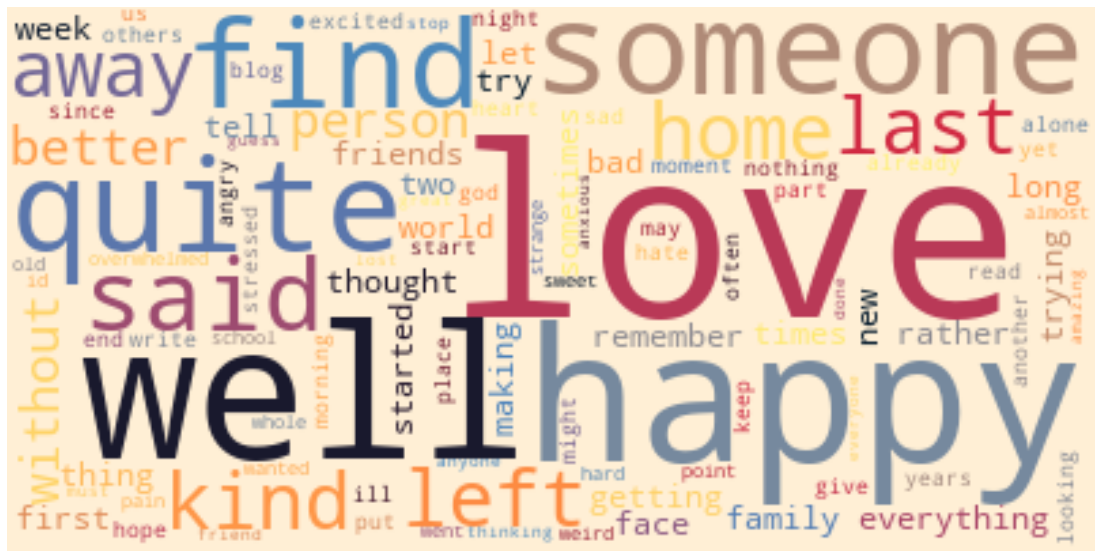

In [ ]:
hero.wordcloud(df.texthero_stopwords_text, max_words=100,)

In [ ]:
df['textHero_tfidf'] = (hero.tfidf(df['texthero_stopwords_text'], max_features=100))
df['pca_tfidf_texthero'] = hero.pca(df['textHero_tfidf'])
df

In [ ]:
hero.scatterplot(df, col='pca_tfidf_texthero', color='Emotion', title="Emotion space")

In [ ]:
df_groupby = df.groupby('Emotion').mean()
df_groupby

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,text_to_matrix,text_lemmatize_to_matrix,mean_matrix_text,sum_matrix_text,mean_matrix_text_lemmatize,sum_matrix_text_lemmatize
Emotion,,,,,,
0,"[0.8685361698203283, 0.2860196231068495, -0.30...","[1.063648649750578, 0.4912877224128147, -0.265...","[0.9855325929988207, 0.38117763455683523, -0.2...","[0.9855325929988207, 0.38117763455683523, -0.2...","[1.1881397805835163, 0.5784563903057169, -0.18...","[1.1881397805835163, 0.5784563903057169, -0.18..."
1,"[1.0060995599904958, 0.3367515131698893, -0.21...","[1.209362311598798, 0.563393450509796, -0.1393...","[0.9600263570068243, 0.3698263300120999, -0.27...","[0.9600263570068243, 0.3698263300120999, -0.27...","[1.168321734175073, 0.5690105892547831, -0.210...","[1.168321734175073, 0.5690105892547831, -0.210..."
2,"[1.0215834478886427, 0.37680979056869124, -0.0...","[1.2343708377226685, 0.5626554207254967, -0.04...","[0.9307307032168346, 0.33053370835036366, -0.3...","[0.9307307032168346, 0.33053370835036366, -0.3...","[1.1768108058495852, 0.5406541844747069, -0.27...","[1.1768108058495852, 0.5406541844747069, -0.27..."
3,"[1.0211861911854496, 0.348443773099377, -0.458...","[1.3207884768894427, 0.5958113417101581, -0.38...","[1.0058641284152803, 0.3182275868189974, -0.25...","[1.0058641284152803, 0.3182275868189974, -0.25...","[1.2056229629302222, 0.5325974569829844, -0.22...","[1.2056229629302222, 0.5325974569829844, -0.22..."
4,"[0.9983584155260689, 0.22930716690821112, -0.2...","[1.1840064990210124, 0.44287255375740964, -0.1...","[0.9332985788714626, 0.36561392478236404, -0.2...","[0.9332985788714626, 0.36561392478236404, -0.2...","[1.1599013906706563, 0.578927472094855, -0.223...","[1.1599013906706563, 0.578927472094855, -0.223..."
5,"[1.0337944713511398, 0.5400332959570758, -0.26...","[1.2662859032681546, 0.7293557246838979, -0.21...","[0.9965141489805419, 0.40396866179134544, -0.2...","[0.9965141489805419, 0.40396866179134544, -0.2...","[1.2093904639823574, 0.6106877112201993, -0.20...","[1.2093904639823574, 0.6106877112201993, -0.20..."


In [ ]:
hero.scatterplot(df_groupby.reset_index(), col='mean_matrix_text_lemmatize', color='Emotion', title="Emotion space")

In [ ]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest
find_similar_word(emmbed_dict['angry'])[0:10]

['angry',
 'enraged',
 'furious',
 'irate',
 'outraged',
 'frustrated',
 'angered',
 'incensed',
 'provoked',
 'infuriated']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21405 entries, 0 to 21458
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Text                             21405 non-null  object
 1   Emotion                          21405 non-null  int64 
 2   nltk_text_lematize               21405 non-null  object
 3   texthero_stopwords_text          21405 non-null  object
 4   texthero_stopwords_lemmatize     21405 non-null  object
 5   to_sequence_stopwords_text       21405 non-null  object
 6   to_sequence_stopwords_lemmatize  21405 non-null  object
 7   text_to_matrix                   21405 non-null  object
 8   text_lemmatize_to_matrix         21405 non-null  object
 9   mean_matrix_text                 21405 non-null  object
 10  sum_matrix_text                  21405 non-null  object
 11  mean_matrix_text_lemmatize       21405 non-null  object
 12  sum_matrix_text_lemmatize       

In [ ]:
# Matrix of vectors 

df_matrix = pd.DataFrame(df.to_sequence_stopwords_text.apply(lambda row : embeder(row)))
df_matrix = pd.DataFrame(np.stack(df_matrix.to_sequence_stopwords_text.values))
df_matrix['target'] = df.Emotion
df_matrix

# Model FastText

In [ ]:
df.loc[df.Emotion == 0, 'Emotion'] = 'sadness'
df.loc[df.Emotion == 1, 'Emotion'] = 'anger'
df.loc[df.Emotion == 2, 'Emotion'] = 'love'
df.loc[df.Emotion == 3, 'Emotion'] = 'surprise' 
df.loc[df.Emotion == 4, 'Emotion'] = 'fear'
df.loc[df.Emotion == 5, 'Emotion'] = 'happy'

df.Emotion = np.asarray(df.Emotion).astype(str).reshape((-1,1))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Without lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_text, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


textHero_train_df = pd.DataFrame(X_train.values, y_train).reset_index()
textHero_train_df.columns = ["target","clean_text"]
textHero_train_df["target"] = textHero_train_df[["target"]].apply(lambda x: '__label__' + x)



textHero_test_df = pd.DataFrame(X_test.values, y_test).reset_index()
textHero_test_df.columns = ["target","clean_text"]
textHero_test_df["target"] = textHero_test_df[["target"]].apply(lambda x: '__label__' + x)



textHero_valid_df = pd.DataFrame(X_valid.values, y_valid).reset_index()
textHero_valid_df.columns = ["target","clean_text"]
textHero_valid_df["target"] = textHero_valid_df[["target"]].apply(lambda x: '__label__' + x)


In [ ]:
textHero_valid_df

,target,clean_text
0,__label__happy,bet safe keeping cage chances col...
1,__label__anger,selfish
2,__label__happy,triumphant held conversation cashier...
3,__label__sadness,woke often pukey radiation groggy
4,__label__sadness,guilty sitting concert working hard
...,...,...
1173,__label__fear,neither ask deserve frightened kook put...
1174,__label__sadness,numb wonder whether human
1175,__label__sadness,might stress important expose fr...
1176,__label__happy,fighting sniffles developed last night wasn...


In [ ]:
import fasttext

In [ ]:
import csv
textHero_train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/train_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_valid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [ ]:
model = fasttext.train_supervised(input="/content/drive/MyDrive/Colab Notebooks/train_textHero.txt",  wordNgrams = 2)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt') 

(1177, 0.8666100254885302, 0.8666100254885302)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt') 

(1178, 0.8811544991511036, 0.8811544991511036)

## With lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


textHero_train_df = pd.DataFrame(X_train.values, y_train).reset_index()
textHero_train_df.columns = ["target","clean_text"]
textHero_train_df["target"] = textHero_train_df[["target"]].apply(lambda x: '__label__' + x)



textHero_test_df = pd.DataFrame(X_test.values, y_test).reset_index()
textHero_test_df.columns = ["target","clean_text"]
textHero_test_df["target"] = textHero_test_df[["target"]].apply(lambda x: '__label__' + x)



textHero_valid_df = pd.DataFrame(X_valid.values, y_valid).reset_index()
textHero_valid_df.columns = ["target","clean_text"]
textHero_valid_df["target"] = textHero_valid_df[["target"]].apply(lambda x: '__label__' + x)


In [ ]:
import csv
textHero_train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/train_textHero_lemmatize.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/test_textHer_lemmatizeo.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_valid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/valid_textHero_lemmatize.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [ ]:
model = fasttext.train_supervised(input="/content/drive/MyDrive/Colab Notebooks/train_textHero_lemmatize.txt",  wordNgrams = 2)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt') 

(1177, 0.8402718776550552, 0.8402718776550552)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt') 

(1178, 0.8505942275042445, 0.8505942275042445)

# Data augmentation

# Hugging Face

In [ ]:
# code here 